# Setup environment

In [1]:
# SPECIFY QUESTION NUMBER YOU ARE WORKING ON FOR THIS RuntimeError {Q1, Q2, Q3}
# (this will ensure outputs go to correct Google Drive folder)

QUESTION = "Q2"

In [2]:
# install pytorch 

!pip3 install torch
!pip3 install torchvision as tv
!pip3 install pycm

  Created wheel for tv: filename=tv-0.1-cp36-none-any.whl size=4672 sha256=5d61d10f94844f9aa0cc23c1558132e9158062327b60f8e20aeafa387dffac2c
  Stored in directory: /root/.cache/pip/wheels/8f/3e/84/de553a018dd3b3e5460010ef1bb9bd021a77887171850b973e
Successfully built tv
     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 573kB 8.7MB/s 


In [3]:
# import relevant libraries

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as tv
import torch.nn.functional as F

In [4]:
# mount Google Drive for storing any outputs
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Specify path for storing outputs
ravi_output_path = f"/content/drive/My Drive/Machine_learning/UCL/Modules/DL/dl_coursework3/{QUESTION}_output/"
toby_output_path = f"/content/drive/My Drive/.............................../dl_coursework3/{QUESTION}_output/"
louis_output_path = f"/content/drive/My Drive/dl_coursework3/{QUESTION}_output/"
udi_output_path = f"/content/drive/My Drive/.............................../dl_coursework3/{QUESTION}_output/"
daniel_output_path = f"/content/drive/My Drive/dl_coursework3/{QUESTION}_output/"

output_path = daniel_output_path

Mounted at /content/drive


# Loading and splitting the Fashion MNIST dataset

In [5]:
# load fashion mnist (fm) dataset

transform = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.5,), (0.5,))])

fm1_train_val = tv.datasets.FashionMNIST(root = "./data", train = True, download = True, transform = transform)
fm1_test = tv.datasets.FashionMNIST(root = "./data", train = False, download = True, transform = transform)
fm2_train_val = tv.datasets.FashionMNIST(root = "./data", train = True, download = True, transform = transform)
fm2_test = tv.datasets.FashionMNIST(root = "./data", train = False, download = True, transform = transform)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
# split training datasets into fm1, and fm2, so different classes in each

# specify classes to include in fm1 and fm2
fm1_labels = [0, 1, 4, 5, 8]
fm2_labels = [2, 3, 6, 7, 9]


# update fm1 and fm2 train_val datasets to just include the relevant classes for train_val datasets

# extract indices (boolean array) of images corresponding to each of the classes for fm1, and fm2
fm1_train_val_indices = (fm1_train_val.targets ==0) | (fm1_train_val.targets ==1) | (fm1_train_val.targets ==4) | (fm1_train_val.targets ==5) | (fm1_train_val.targets ==8)
fm2_train_val_indices = (fm2_train_val.targets ==2) | (fm2_train_val.targets ==3) | (fm2_train_val.targets ==6) | (fm2_train_val.targets ==7) | (fm2_train_val.targets ==9)

##fm1
fm1_train_val.data = fm1_train_val.data[fm1_train_val_indices]
fm1_train_val.targets = fm1_train_val.targets[fm1_train_val_indices]
### re-index labels, otherwise dataloader does not work
fm1_train_val.targets[fm1_train_val.targets == 4] = 2
fm1_train_val.targets[fm1_train_val.targets == 5] = 3
fm1_train_val.targets[fm1_train_val.targets == 8] = 4

##fm2
fm2_train_val.data = fm2_train_val.data[fm2_train_val_indices]
fm2_train_val.targets = fm2_train_val.targets[fm2_train_val_indices]
### re-index labels, otherwise dataloader does not work
fm2_train_val.targets[fm2_train_val.targets == 2] = 0
fm2_train_val.targets[fm2_train_val.targets == 3] = 1
fm2_train_val.targets[fm2_train_val.targets == 6] = 2
fm2_train_val.targets[fm2_train_val.targets == 7] = 3
fm2_train_val.targets[fm2_train_val.targets == 9] = 4


# repeat the above but for the test datasets

fm1_test_indices = (fm1_test.targets ==0) | (fm1_test.targets ==1) | (fm1_test.targets ==4) | (fm1_test.targets ==5) | (fm1_test.targets ==8)
fm2_test_indices = (fm2_test.targets ==2) | (fm2_test.targets ==3) | (fm2_test.targets ==6) | (fm2_test.targets ==7) | (fm2_test.targets ==9)

##fm1
fm1_test.data = fm1_test.data[fm1_test_indices]
fm1_test.targets = fm1_test.targets[fm1_test_indices]
#### re-index labels, otherwise dataloader does not work
fm1_test.targets[fm1_test.targets == 4] = 2
fm1_test.targets[fm1_test.targets == 5] = 3
fm1_test.targets[fm1_test.targets == 8] = 4

##fm2
fm2_test.data = fm2_test.data[fm2_test_indices]
fm2_test.targets = fm2_test.targets[fm2_test_indices]
### re-index labels, otherwise dataloader does not work
fm2_test.targets[fm2_test.targets == 2] = 0
fm2_test.targets[fm2_test.targets == 3] = 1
fm2_test.targets[fm2_test.targets == 6] = 2
fm2_test.targets[fm2_test.targets == 7] = 3
fm2_test.targets[fm2_test.targets == 9] = 4

In [7]:
# Create dictionaries to map new indexes to items
fm1_label_newindex_to_oldindex = {0: 0, 1: 1, 2: 4, 3: 5, 4: 8}
fm2_label_newindex_to_oldindex = {0: 2, 1: 3, 2: 6, 3: 7, 4: 9}

fm1_label_index_to_text_dict = {0: "T-shirt/top", 1: "Trouser", 2: "Coat", 3: "Sandal", 4: "Bag"}
fm2_label_index_to_text_dict = {0: "Pullover", 1: "Dress", 2: "Shirt", 3: "Sneaker", 4: "Ankle boot"}

In [8]:
# split the train_val datasets into seperate train and validation datasets

fm1_train, fm1_val = torch.utils.data.random_split(fm1_train_val, [25000, 5000])
fm2_train, fm2_val = torch.utils.data.random_split(fm2_train_val, [25000, 5000])

In [9]:
# create dataloaders for each of the datasets

train_batch_size = 100
dev_batch_size = 1
test_batch_size = 1

fm1_trainloader = torch.utils.data.DataLoader(fm1_train, batch_size = train_batch_size, shuffle = True)
fm1_devloader = torch.utils.data.DataLoader(fm1_val, batch_size = dev_batch_size, shuffle = False)
fm1_testloader = torch.utils.data.DataLoader(fm1_test, batch_size = test_batch_size, shuffle = False)

fm2_trainloader = torch.utils.data.DataLoader(fm2_train,  batch_size = train_batch_size, shuffle = True)
fm2_devloader = torch.utils.data.DataLoader(fm2_val, batch_size = dev_batch_size, shuffle = False)
fm2_testloader = torch.utils.data.DataLoader(fm2_test, batch_size = test_batch_size, shuffle = False)

Class: Sandal


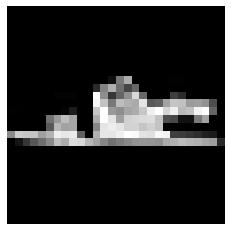

Class: Sandal


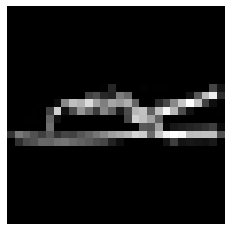

In [10]:
# display images and labels

NUMBER_TO_DISPLAY = 2

for i, (xb, yb) in enumerate(fm1_devloader):
    x = xb.view(28,28) 
    y = yb.item()
    print(f"Class: {fm1_label_index_to_text_dict[y]}")
    
    plt.imshow(x, cmap="gray")
    plt.axis('off')
    plt.show()
    
    if i == NUMBER_TO_DISPLAY-1:
      break

In [ ]:
# Hyperparameters to grid search over (GRID SEARCH SCENARIO)

# NOTE1: L2 regularisation is implemented using weight_decay in the optimiser
# However, for SGD weight_decay is exactly this, but that is not the case for Adam
# Instead there is another form of Adam called AdamW that makes weight decay the L2 norm (as classically formulated)

# NOTE2: Certain pairings of the grid search hyperparameters have been excluded (see if continue statements in training loop)
# This was based on findings of initial scoping experiments to identify clearly inappropriate pairings

# UNCOMMENT BELOW TO DO THE GRID SEARCH

# hyperparam_grid = {'num_dense_layers': [1,2,3],
#                    'num_conv_layers': [1,2],
#                    'learning_rate': [0.02, 0.005,0.0005],
#                    'weight_decay': [0,0.01,0.05], # Regularisation (?is this equivalent)
#                    'optimiser': ["SGD", "AdamW"],
#                    'batch_size': [train_batch_size]
# }

# UNCOMMENT BELOW TO DO A SINGLE RUN

# hyperparameters
hyperparams = {'num_dense_layers': 2,
               'num_conv_layers': 2,
               'learning_rate': 0.005,
               'weight_decay': 0.001, # Regularisation
               'optimiser': "AdamW",
               'batch_size': train_batch_size}

# range of epochs
min_epochs = 20
max_epochs = 300

# number of classes 
num_classes = 5

# initiate dataframe to store results of grid search 
results_df = pd.DataFrame()

In [ ]:
print(hyperparams)

{'num_dense_layers': 2, 'num_conv_layers': 2, 'learning_rate': 0.005, 'weight_decay': 0.01, 'optimiser': 'SGD', 'batch_size': 100}


In [ ]:
# PyTorch model class, which takes the specified hyperparameters as inputs
class CNN(nn.Module):
  
  def __init__(self, num_classes, num_dense_layers, num_conv_layers):
    super(CNN, self).__init__()
    self.num_dense_layers = num_dense_layers
    self.num_conv_layers = num_conv_layers

    # single conv layer
    if num_conv_layers == 1:
      self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
      self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

      # dense layers
      if num_dense_layers == 1:
        self.fc1 = nn.Linear(6*(12**2), num_classes)
      elif num_dense_layers == 2:
        self.fc1 = nn.Linear(6*(12**2), 80)
        self.fc2 = nn.Linear(80, num_classes)
      elif num_dense_layers == 3:
        self.fc1 = nn.Linear(6*(12**2), 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    # two conv layers
    elif num_conv_layers == 2:
      self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
      self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
      self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
      self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

      # dense layers
      if num_dense_layers == 1:
        self.fc1 = nn.Linear(12*(4**2), num_classes)
      elif num_dense_layers == 2:
        self.fc1 = nn.Linear(12*(4**2), 80)
        self.fc2 = nn.Linear(80, num_classes)
      elif num_dense_layers == 3:
        self.fc1 = nn.Linear(12*(4**2), 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

  def forward(self, x):
    
    # conv2d and maxpools
    if self.num_conv_layers == 1:
      x = self.pool1(F.relu(self.conv1(x)))
      x = x.view(-1, 6*(12**2))
    elif self.num_conv_layers == 2:
      x = self.pool1(F.relu(self.conv1(x)))
      x = self.pool2(F.relu(self.conv2(x)))
      x = x.view(-1, 12*(4**2))

    # fully-connnected layers
    if self.num_dense_layers == 1:
      x = self.fc1(x)
    if self.num_dense_layers == 2:
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
    if self.num_dense_layers == 3:
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)

    return x

cuda
epoch: 1, train_loss: 0.1974, train_acc: 0.9393, val_loss: 0.1062, val_acc: 0.9682
epoch: 2, train_loss: 0.0854, train_acc: 0.9743, val_loss: 0.0900, val_acc: 0.9728
epoch: 3, train_loss: 0.0674, train_acc: 0.9796, val_loss: 0.0682, val_acc: 0.9806
epoch: 4, train_loss: 0.0587, train_acc: 0.9823, val_loss: 0.0659, val_acc: 0.9810
epoch: 5, train_loss: 0.0500, train_acc: 0.9844, val_loss: 0.0611, val_acc: 0.9844
epoch: 6, train_loss: 0.0437, train_acc: 0.9865, val_loss: 0.0619, val_acc: 0.9808
epoch: 7, train_loss: 0.0396, train_acc: 0.9877, val_loss: 0.0680, val_acc: 0.9818
epoch: 8, train_loss: 0.0386, train_acc: 0.9882, val_loss: 0.0597, val_acc: 0.9826
epoch: 9, train_loss: 0.0348, train_acc: 0.9891, val_loss: 0.0709, val_acc: 0.9830
epoch: 10, train_loss: 0.0289, train_acc: 0.9908, val_loss: 0.0637, val_acc: 0.9846
epoch: 11, train_loss: 0.0273, train_acc: 0.9911, val_loss: 0.0651, val_acc: 0.9848
epoch: 12, train_loss: 0.0255, train_acc: 0.9916, val_loss: 0.0759, val_acc: 0.9

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


epoch: 21, train_loss: 0.0161, train_acc: 0.9947, val_loss: 0.0644, val_acc: 0.9856
epoch: 22, train_loss: 0.0134, train_acc: 0.9956, val_loss: 0.0993, val_acc: 0.9856
epoch: 23, train_loss: 0.0134, train_acc: 0.9955, val_loss: 0.0737, val_acc: 0.9850
epoch: 24, train_loss: 0.0142, train_acc: 0.9954, val_loss: 0.0921, val_acc: 0.9822
epoch: 25, train_loss: 0.0184, train_acc: 0.9941, val_loss: 0.1068, val_acc: 0.9840
epoch: 26, train_loss: 0.0129, train_acc: 0.9958, val_loss: 0.0871, val_acc: 0.9856
epoch: 27, train_loss: 0.0225, train_acc: 0.9937, val_loss: 0.1019, val_acc: 0.9842
Model Converged
BEST MODEL TEST ACCURACY: 0.9812
BEST MODEL TEST LOSS: 0.09648639561601971
{'num_dense_layers': 2, 'num_conv_layers': 2, 'learning_rate': 0.005, 'weight_decay': 0.001, 'optimiser': 'AdamW', 'batch_size': 100, 'best_epoch': 18, 'best_validation_loss': 0.053859082427898136, 'associated_validation_accuracy': 0.9868, 'associated_training_loss': 0.019555902502586833, 'associated_training_accuracy':

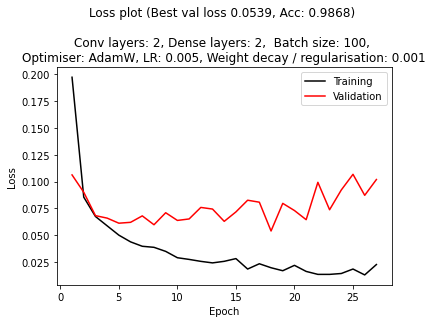

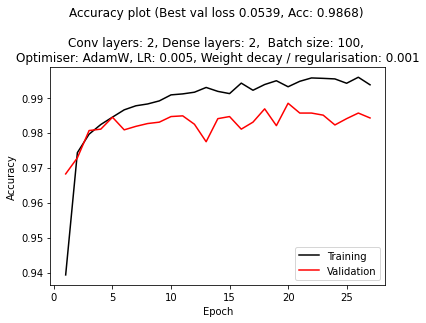

In [ ]:
# Initialise model and send to GPU

model = CNN(num_classes, hyperparams['num_dense_layers'], hyperparams['num_conv_layers'])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)


# Loss & optimiser
criterion = nn.CrossEntropyLoss() # note that this will apply the softmax for us

if hyperparams['optimiser'] == "SGD":
  optimiser = torch.optim.SGD(model.parameters(), lr=hyperparams['learning_rate'], weight_decay=hyperparams['weight_decay'])
elif hyperparams['optimiser'] == "Adam":
  optimiser = torch.optim.Adam(model.parameters(), lr=hyperparams['learning_rate'])
elif hyperparams['optimiser'] == "AdamW":
  optimiser = torch.optim.AdamW(model.parameters(), lr=hyperparams['learning_rate'], weight_decay=hyperparams['weight_decay'])


# training loop

train_loss_list = []
train_accuracy_list = []
dev_loss_list = []
dev_accuracy_list = []

best_dev_loss = 9999 # initiate high value so that training doesn't immediately stop

converged = False
epochs_counter = 0
epochs_to_plot = []

while (converged == False) and (epochs_counter <= max_epochs):
  
  train_running_loss = 0
  train_running_corrects = 0
  train_num_of_batches = 0

  model.train()

  for data, label in fm1_trainloader:

    data = data.to(device)
    label = label.to(device)

    # zero the gradients
    optimiser.zero_grad()

    # forward + backward + optimize
    train_preds = model(data)
    loss = criterion(train_preds, label.long())
    loss.backward()
    optimiser.step()

    # metrics
    train_preds_indices = torch.argmax(train_preds.data, 1) 
    train_running_corrects += (train_preds_indices == label).sum().item()
    train_running_loss += loss.item()
    train_num_of_batches +=1
  
  train_accuracy = train_running_corrects/(train_num_of_batches*train_batch_size)
  train_accuracy_list.append(train_accuracy)
  train_loss = train_running_loss/train_num_of_batches
  train_loss_list.append(train_loss)

  
  model.eval()   

  with torch.no_grad():
    
    dev_running_loss = 0
    dev_running_corrects = 0
    dev_num_of_batches = 0

    for data, label in fm1_devloader:

      data = data.to(device)
      label = label.to(device)

      # forward
      dev_preds = model(data)
      loss = criterion(dev_preds, label.long())

      # metrics
      dev_preds_indices = torch.argmax(dev_preds.data, 1) 
      dev_running_corrects += (dev_preds_indices == label).sum().item()
      dev_running_loss += loss.item()
      dev_num_of_batches +=1
  
    dev_accuracy = dev_running_corrects/(dev_num_of_batches*dev_batch_size)
    dev_accuracy_list.append(dev_accuracy)
    dev_loss = dev_running_loss/dev_num_of_batches
    dev_loss_list.append(dev_loss)

    epochs_counter += 1
    epochs_to_plot.append(epochs_counter)

    print(f"epoch: {epochs_counter}, train_loss: {train_loss:.4f}, train_acc: {train_accuracy:.4f}, val_loss: {dev_loss:.4f}, val_acc: {dev_accuracy:.4f}")

    # Store the current results if it has the smallest validation loss so far
    if dev_loss < best_dev_loss:
        best_dev_accuracy = dev_accuracy 
        best_dev_loss = dev_loss
        best_train_accuracy = train_accuracy
        best_train_loss = train_loss
        best_epoch = epochs_counter
        best_model = model
    
    # Early stopping criteria
    if epochs_counter >= min_epochs:
      if (np.mean(dev_loss_list[-20:]) - np.mean(dev_loss_list[-40:-20])) > 0.001:
        converged = True
        print("Model Converged")


# Evaluate loss and accuracy on test set

with torch.no_grad():
  
  test_running_loss = 0
  test_running_corrects = 0
  test_num_of_batches = 0

  predictions_list = []
  labels_list = []

  for data, label in fm1_testloader:

    data = data.to(device)
    label = label.to(device)

    # forward
    test_preds = best_model(data)
    loss = criterion(test_preds, label.long())

    # metrics
    test_preds_indices = torch.argmax(test_preds.data, 1) 
    test_running_corrects += (test_preds_indices == label).sum().item()
    test_running_loss += loss.item()
    test_num_of_batches +=1

    labels_list.append(label.long().item())
    predictions_list.append(test_preds_indices.item())

  test_accuracy = test_running_corrects/(test_num_of_batches*test_batch_size)
  test_loss = test_running_loss/test_num_of_batches

print(f"BEST MODEL TEST ACCURACY: {test_accuracy}")
print(f"BEST MODEL TEST LOSS: {test_loss}")

# Save results from epoch with best validation loss

hyperparams['best_epoch'] = best_epoch
hyperparams['best_validation_loss'] = best_dev_loss
hyperparams['associated_validation_accuracy'] = best_dev_accuracy
hyperparams['associated_training_loss'] = best_train_loss
hyperparams['associated_training_accuracy'] = best_train_accuracy
hyperparams['test_loss'] = test_loss
hyperparams['test_accuracy'] = test_accuracy

results_df = results_df.append(hyperparams, ignore_index=True)
results_df = results_df.sort_values("best_validation_loss", ascending=False).round(4)
results_df.to_csv(f"{output_path}RESULTS_TABLE_MODEL_{best_dev_loss:.4f}_devloss_{best_dev_accuracy:.4f}_devacc_.csv")

print(hyperparams)

# save the model
torch.save(best_model, f"{output_path}MODEL_{best_dev_loss:.4f}_devloss_{best_dev_accuracy:.4f}_devacc.pth")

# Loss plot
plt.plot(epochs_to_plot, train_loss_list, color='k', linestyle='-')
plt.plot(epochs_to_plot, dev_loss_list, color='r', linestyle='-')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.ylabel('Loss', color='k')
plt.xlabel('Epoch', color='k')
plt.title(f'''Loss plot (Best val loss {best_dev_loss:.4f}, Acc: {best_dev_accuracy:.4f}) \n 
Conv layers: {hyperparams['num_conv_layers']}, Dense layers: {hyperparams['num_dense_layers']},  Batch size: {hyperparams['batch_size']}, 
Optimiser: {hyperparams['optimiser']}, LR: {hyperparams['learning_rate']}, Weight decay / regularisation: {hyperparams['weight_decay']}''', color='k')

plt.savefig(f"{output_path}MODEL_{best_dev_loss:.4f}_devloss_{best_dev_accuracy:.4f}_devacc_LOSSPLOT.png", dpi=300, bbox_inches = "tight")
plt.show()

# Accuracy plot 
plt.plot(epochs_to_plot, train_accuracy_list, color='k', linestyle='-')
plt.plot(epochs_to_plot, dev_accuracy_list, color='r', linestyle='-')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.ylabel('Accuracy', color='k')
plt.xlabel('Epoch', color='k')
plt.title(f'''Accuracy plot (Best val loss {best_dev_loss:.4f}, Acc: {best_dev_accuracy:.4f}) \n 
Conv layers: {hyperparams['num_conv_layers']}, Dense layers: {hyperparams['num_dense_layers']},  Batch size: {hyperparams['batch_size']}, 
Optimiser: {hyperparams['optimiser']}, LR: {hyperparams['learning_rate']}, Weight decay / regularisation: {hyperparams['weight_decay']}''', color='k')

plt.savefig(f"{output_path}MODEL_{best_dev_loss:.4f}_devloss_{best_dev_accuracy:.4f}_devacc_ACCPLOT.png", dpi=300, bbox_inches = "tight")
plt.show()